In [ ]:
# Andréanne Proulx, 2021-07-26
# PSY6983 Python for data analysis exercice

In [164]:
# 1. imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [165]:
# 2. load data
iris = load_iris()

In [166]:
# 3. Explore the dataset using .keys()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [167]:
# 4. Print the shape and type of data
shape = iris["data"].shape
type = iris["data"].dtype

print("The shape of the data is : {}".format(shape))
print("The type of the data is : {}".format(type))

The shape of the data is : (150, 4)
The type of the data is : float64


In [168]:
# 5. Store 'data' and 'features_names' in variables
data = iris["data"] # same as iris.feature_names
feature_names = iris["feature_names"] # same as iris.feature_names

In [169]:
# 6. Create a dataframe with the data and use feature_names for column names
df = pd.DataFrame(data,columns= feature_names)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [170]:
# 7. Get statistics for this dataframe using .describe()
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [171]:
# 8. Keep only the first 50 rows only
df_50 = df[:50][:]

In [174]:
# 9. Create an empty list to store extreme values for sepal length
extreme_values = []

# Get column "sepal length" 
sepal_length = df["sepal length (cm)"]

# get mean
mean = sepal_length.mean()
print(mean)

# get std
std = sepal_length.std()
print(std)

# use for loop to iterate over every row
for length in sepal_length:
        
    # compute the standardized value -> formula = (value - mean)/std
    e_t = (length - mean) / std
    
    # if > 3.9 standard deviation, consider extreme
    if abs(e_t) > 3.9:
        
        # append extreme value
        extreme_values.append(length)

5.843333333333334
0.828066127977863


In [175]:
# No extreme values are found
print(extreme_values)

[]


In [182]:
# 10. what about other features? This is basically repeating the previous operations, but on a different column. Try automating this by writing a function.

def find_extreme_values(df, column, extreme = 3.9):
    '''
    Find extreme values for a given column
    
    Args
    
    
    returns
    
    '''
    
    # initialize empty list to contain extreme values
    extreme_values = []
    
    # get column
    col = df[column].astype(float)
    
    # compute mean
    mean = col.mean()
    
    # compute std
    std = col.std()
    
    for row in col:
        
        # compite standard deviation
        e_t = (row-mean)/std
        
        #print(e_t)
        
        if abs(e_t) >= extreme:
        
            #print(abs(e_t))
        
            # add to df 
            extreme_values.append(e_t)
        
    return extreme_values

In [183]:
find_extreme_values(df, "sepal width (cm)", extreme = 3.9)

[]

Text(0, 0.5, 'Y')

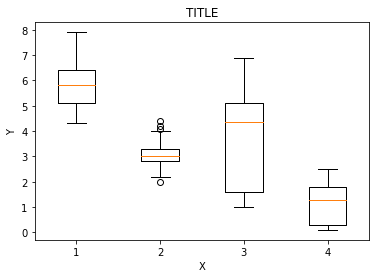

In [137]:
# 11-13. boxplot distribution
plt.boxplot(df)

# add title
plt.title("TITLE")
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("iris_boxplot.png")

In [ ]:
# All done. Check 